<a href="https://colab.research.google.com/github/fatemafaria142/Apple_Quality_Prediction/blob/main/Apple_Quality_Prediction_Data_Analysis_Part.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


#### **import data manipulation and visualization libraries**

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
file_path = "/content/drive/MyDrive/Practice_Project_Datasets/apple_quality.csv"
# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

In [48]:
# Display the first few rows of the DataFrame
print("First 5 rows:")
df.head()

First 5 rows:


,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good


In [49]:
# Display the last few rows of the DataFrame
print("\nLast 5 rows:")
df.tail()


Last 5 rows:


,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
3996,3996.0,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285,good
3997,3997.0,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391,bad
3998,3998.0,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806,good
3999,3999.0,0.278540,-1.715505,0.121217,-1.154075,1.266677,-0.776571,1.599796456,good
4000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Created_by_Nidula_Elgiriyewithana,NaN


In [50]:
total_length = len(df)
print(f"Total length of the dataset: {total_length} rows")

Total length of the dataset: 4001 rows


In [51]:
# Check for NaN values in the entire DataFrame
print(df.isnull().sum())

A_id           1
Size           1
Weight         1
Sweetness      1
Crunchiness    1
Juiciness      1
Ripeness       1
Acidity        0
Quality        1
dtype: int64


In [52]:
# Fill missing values with the median for specific columns
columns_to_fill = ['A_id', 'Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness']
df_filled = df.copy()
df_filled[columns_to_fill] = df_filled[columns_to_fill].fillna(df_filled[columns_to_fill].median())

# Display the DataFrame after filling missing values
df_filled.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good


In [53]:
# Check for NaN values in the entire DataFrame
print(df_filled.isnull().sum())

A_id           0
Size           0
Weight         0
Sweetness      0
Crunchiness    0
Juiciness      0
Ripeness       0
Acidity        0
Quality        1
dtype: int64


In [54]:
# Check unique values and their counts in the "Quality" column
quality_counts = df['Quality'].value_counts()

# Display the result
print("Quality counts:")
print(quality_counts)

Quality counts:
good    2004
bad     1996
Name: Quality, dtype: int64


In [55]:
# Fill missing values in the "Quality" column with 'bad'
df_filled['Quality'].fillna('bad', inplace=True)

In [56]:
# Check for NaN values in the entire DataFrame
print(df_filled.isnull().sum())

A_id           0
Size           0
Weight         0
Sweetness      0
Crunchiness    0
Juiciness      0
Ripeness       0
Acidity        0
Quality        0
dtype: int64


In [57]:
# Check unique values in the "Acidity" column
acidity_values = df_filled['Acidity'].unique()

# Display the result
print("Unique values in Acidity:")
print(acidity_values)

Unique values in Acidity:
['-0.491590483' '-0.722809367' '2.621636473' ... '-2.229719806'
 '1.599796456' 'Created_by_Nidula_Elgiriyewithana']


In [58]:
column_name = "Acidity"

# Replace the specific value with NaN
df_filled[column_name] = df_filled[column_name].replace("Created_by_Nidula_Elgiriyewithana", np.nan)

# Calculate the median excluding NaN values
median_value = df_filled[column_name].median()

# Replace NaN values with the calculated median
df_filled[column_name].fillna(median_value, inplace=True)

# Convert the "Acidity" column to float64
df_filled[column_name] = df_filled[column_name].astype('float64')

In [59]:
# Display general information about the DataFrame
df_filled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4001 non-null   float64
 1   Size         4001 non-null   float64
 2   Weight       4001 non-null   float64
 3   Sweetness    4001 non-null   float64
 4   Crunchiness  4001 non-null   float64
 5   Juiciness    4001 non-null   float64
 6   Ripeness     4001 non-null   float64
 7   Acidity      4001 non-null   float64
 8   Quality      4001 non-null   object 
dtypes: float64(8), object(1)
memory usage: 281.4+ KB


In [60]:
# Display basic statistics for numerical columns
df_filled.describe()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
count,4001.000000,4001.000000,4001.000000,4001.000000,4001.000000,4001.000000,4001.000000,4001.000000
mean,1999.500000,-0.503017,-0.989545,-0.470487,0.985481,0.512123,0.498279,0.076864
std,1154.700502,1.927818,1.602307,1.943198,1.402582,1.930044,1.874192,2.110006
min,0.000000,-7.151703,-7.149848,-6.894485,-6.055058,-5.961897,-5.864599,-7.010538
25%,1000.000000,-1.816202,-2.011767,-1.738424,0.062865,-0.801238,-0.770970,-1.377338
50%,1999.500000,-0.513703,-0.984736,-0.504758,0.998249,0.534219,0.503445,0.022609
75%,2999.000000,0.805329,0.029773,0.801810,1.893586,1.835903,1.765281,1.510439
max,3999.000000,6.406367,5.790714,6.374916,7.619852,7.364403,7.237837,7.404736


In [63]:
# Display basic statistics for all columns (including non-numerical)
df_filled.describe(include='all')

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
count,4001.000000,4001.000000,4001.000000,4001.000000,4001.000000,4001.000000,4001.000000,4001.000000,4001
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,good
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004
mean,1999.500000,-0.503017,-0.989545,-0.470487,0.985481,0.512123,0.498279,0.076864,NaN
std,1154.700502,1.927818,1.602307,1.943198,1.402582,1.930044,1.874192,2.110006,NaN
min,0.000000,-7.151703,-7.149848,-6.894485,-6.055058,-5.961897,-5.864599,-7.010538,NaN
25%,1000.000000,-1.816202,-2.011767,-1.738424,0.062865,-0.801238,-0.770970,-1.377338,NaN
50%,1999.500000,-0.513703,-0.984736,-0.504758,0.998249,0.534219,0.503445,0.022609,NaN
75%,2999.000000,0.805329,0.029773,0.801810,1.893586,1.835903,1.765281,1.510439,NaN


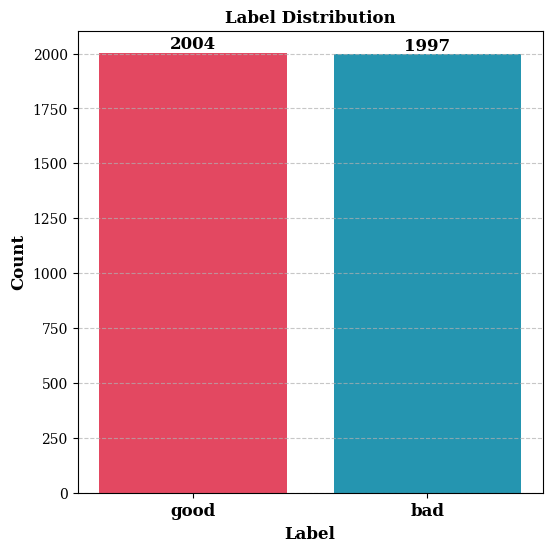

In [64]:
label_counts = df_filled["Quality"].value_counts()

# Define custom colors for the bars
custom_colors = ['#e34861' , '#2595b0']

# Define custom font dictionary for title and labels
font = {'family': 'Serif', 'weight': 'bold', 'size': 12}

plt.figure(figsize=(6, 6))

# Create bar plot with grid
bars = plt.bar(label_counts.index, label_counts.values, color=custom_colors)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Set title and axis labels using custom fontdict
plt.title('Label Distribution', fontdict=font)
plt.xlabel('Label', fontdict=font)
plt.ylabel('Count', fontdict=font)

# Set custom font for ticks on both x and y axes
plt.xticks(label_counts.index, label_counts.index, fontdict=font)
plt.yticks(fontname='Serif', fontsize=10)

# Adding annotations (count values) on top of each bar
for bar, count in zip(bars, label_counts.values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(count),
             ha='center', va='bottom', fontdict=font)

# Show the plot
plt.show()


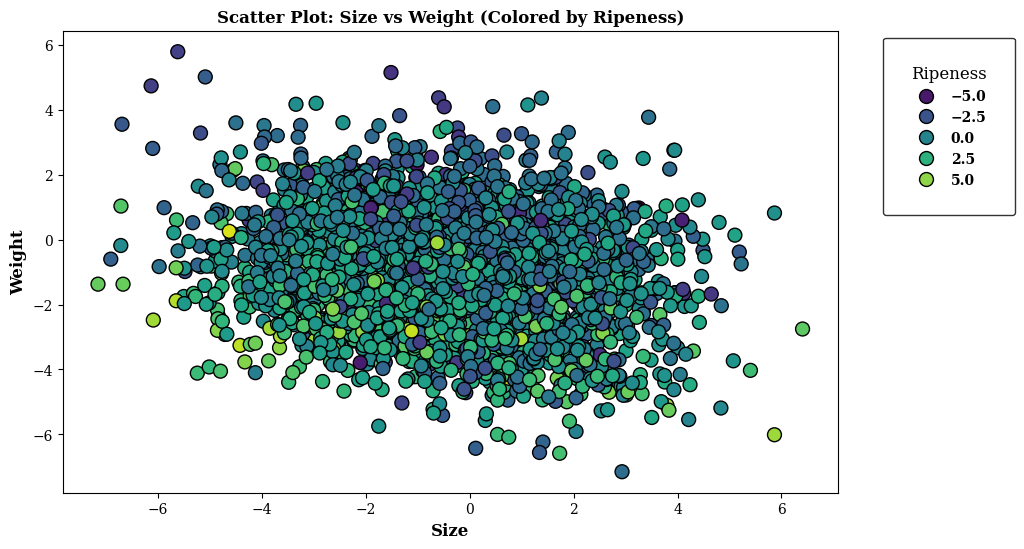

In [110]:
# Assuming df_filled contains the relevant columns
x_column = 'Size'
y_column = 'Weight'
hue_column = 'Ripeness'  # Replace with the third variable you want to use for color

# Define custom color palette
custom_palette = sns.color_palette("viridis", as_cmap=True)

# Define custom font dictionary for title and labels
font = {'family': 'Serif', 'weight': 'bold', 'size': 12}
font2 = {'family': 'Serif', 'weight': 'bold', 'size': 10}

plt.figure(figsize=(10, 6))

# Create a scatter plot for 'Size' against another numeric column with hue
sns.scatterplot(
    x=df_filled[x_column],
    y=df_filled[y_column],
    hue=df_filled[hue_column],
    palette=custom_palette,
    s=100,               # Adjust the size of the circles
    linewidth=1,        # Adjust the border width
    edgecolor='black'   # Set the border color of the circles to black
)

# Set title and axis labels using custom fontdict
plt.title(f'Scatter Plot: {x_column} vs {y_column} (Colored by {hue_column})', fontdict=font)
plt.xlabel(x_column, fontdict=font)
plt.ylabel(y_column, fontdict=font)

plt.xticks(fontname='Serif', fontsize=10)
plt.yticks(fontname='Serif', fontsize=10)


# Display a legend with custom font and styling outside the plot
legend = plt.legend(title=hue_column,
                    prop=font2,
                    fontsize=8,
                    fancybox=True,
                    frameon=True,
                    facecolor='white',
                    edgecolor='black',
                    borderpad=2,
                    bbox_to_anchor=(1.05, 1),
                    loc='upper left')
legend.get_title().set_fontsize(12)  # Adjust the font size of the legend title
legend.get_title().set_fontfamily('Serif')  # Adjust the font family of the legend title

plt.show()


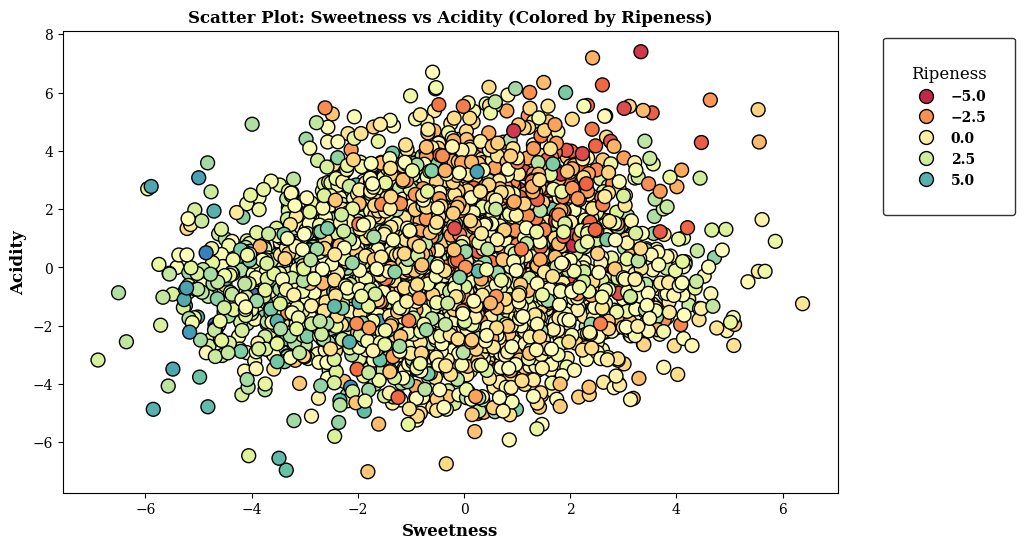

In [104]:
# Assuming df_filled contains the relevant columns
x_column = 'Sweetness'
y_column = 'Acidity'
hue_column = 'Ripeness'  # Replace with the third variable you want to use for color

# Define custom color palette
custom_palette = sns.color_palette("Spectral", as_cmap=True)

# Define custom font dictionary for title and labels
font = {'family': 'Serif', 'weight': 'bold', 'size': 12}
font2 = {'family': 'Serif', 'weight': 'bold', 'size': 10}

plt.figure(figsize=(10, 6))

# Create a scatter plot for 'Size' against another numeric column with hue
sns.scatterplot(
    x=df_filled[x_column],
    y=df_filled[y_column],
    hue=df_filled[hue_column],
    palette=custom_palette,
    s=100,               # Adjust the size of the circles
    linewidth=1,        # Adjust the border width
    edgecolor='black'   # Set the border color of the circles to black
)

# Set title and axis labels using custom fontdict
plt.title(f'Scatter Plot: {x_column} vs {y_column} (Colored by {hue_column})', fontdict=font)
plt.xlabel(x_column, fontdict=font)
plt.ylabel(y_column, fontdict=font)

plt.xticks(fontname='Serif', fontsize=10)
plt.yticks(fontname='Serif', fontsize=10)

# Display a legend with custom font and styling outside the plot
legend = plt.legend(title=hue_column,
                    prop=font2,
                    fontsize=8,
                    fancybox=True,
                    frameon=True,
                    facecolor='white',
                    edgecolor='black',
                    borderpad=2,
                    bbox_to_anchor=(1.05, 1),
                    loc='upper left')
legend.get_title().set_fontsize(12)  # Adjust the font size of the legend title
legend.get_title().set_fontfamily('Serif')  # Adjust the font family of the legend title

plt.show()

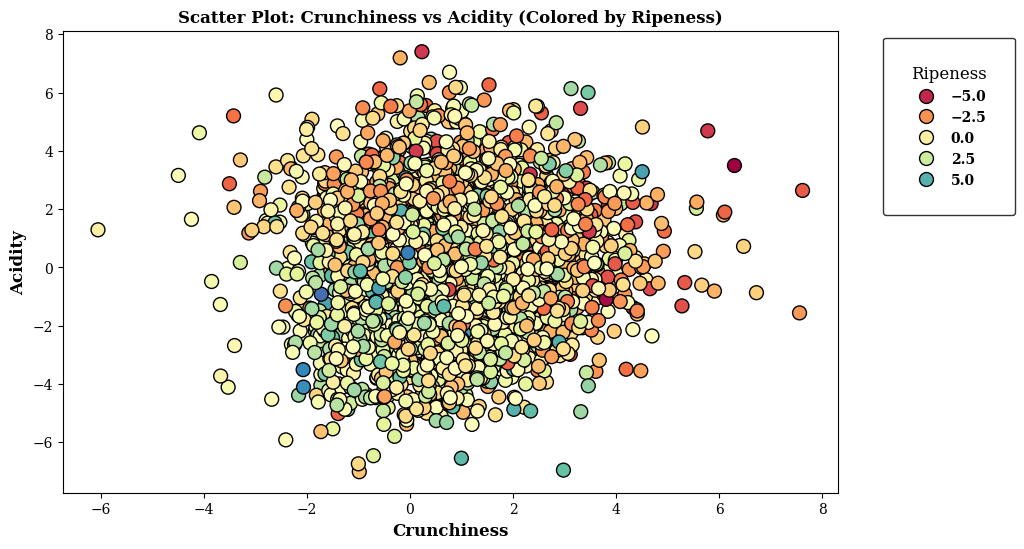

In [105]:
# Assuming df_filled contains the relevant columns
x_column = 'Crunchiness'
y_column = 'Acidity'
hue_column = 'Ripeness'  # Replace with the third variable you want to use for color

# Define custom color palette
custom_palette = sns.color_palette("Spectral", as_cmap=True)

# Define custom font dictionary for title and labels
font = {'family': 'Serif', 'weight': 'bold', 'size': 12}
font2 = {'family': 'Serif', 'weight': 'bold', 'size': 10}

plt.figure(figsize=(10, 6))

# Create a scatter plot for 'Size' against another numeric column with hue
sns.scatterplot(
    x=df_filled[x_column],
    y=df_filled[y_column],
    hue=df_filled[hue_column],
    palette=custom_palette,
    s=100,               # Adjust the size of the circles
    linewidth=1,        # Adjust the border width
    edgecolor='black'   # Set the border color of the circles to black
)

# Set title and axis labels using custom fontdict
plt.title(f'Scatter Plot: {x_column} vs {y_column} (Colored by {hue_column})', fontdict=font)
plt.xlabel(x_column, fontdict=font)
plt.ylabel(y_column, fontdict=font)

plt.xticks(fontname='Serif', fontsize=10)
plt.yticks(fontname='Serif', fontsize=10)

# Display a legend with custom font and styling outside the plot
legend = plt.legend(title=hue_column,
                    prop=font2,
                    fontsize=8,
                    fancybox=True,
                    frameon=True,
                    facecolor='white',
                    edgecolor='black',
                    borderpad=2,
                    bbox_to_anchor=(1.05, 1),
                    loc='upper left')
legend.get_title().set_fontsize(12)  # Adjust the font size of the legend title
legend.get_title().set_fontfamily('Serif')  # Adjust the font family of the legend title

plt.show()

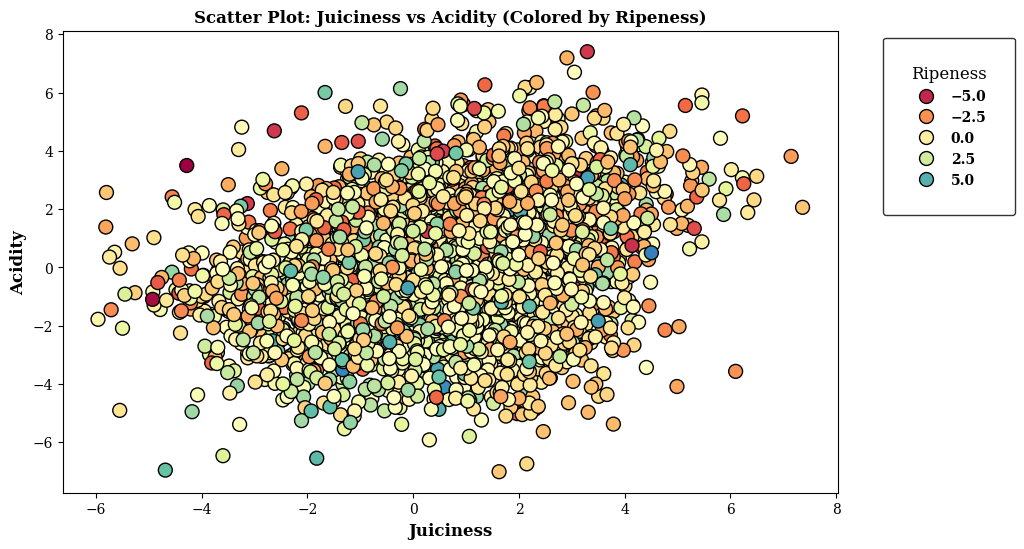

In [106]:
# Assuming df_filled contains the relevant columns
x_column = 'Juiciness'
y_column = 'Acidity'
hue_column = 'Ripeness'  # Replace with the third variable you want to use for color

# Define custom color palette
custom_palette = sns.color_palette("Spectral", as_cmap=True)

# Define custom font dictionary for title and labels
font = {'family': 'Serif', 'weight': 'bold', 'size': 12}
font2 = {'family': 'Serif', 'weight': 'bold', 'size': 10}

plt.figure(figsize=(10, 6))

# Create a scatter plot for 'Size' against another numeric column with hue
sns.scatterplot(
    x=df_filled[x_column],
    y=df_filled[y_column],
    hue=df_filled[hue_column],
    palette=custom_palette,
    s=100,               # Adjust the size of the circles
    linewidth=1,        # Adjust the border width
    edgecolor='black'   # Set the border color of the circles to black
)

# Set title and axis labels using custom fontdict
plt.title(f'Scatter Plot: {x_column} vs {y_column} (Colored by {hue_column})', fontdict=font)
plt.xlabel(x_column, fontdict=font)
plt.ylabel(y_column, fontdict=font)

plt.xticks(fontname='Serif', fontsize=10)
plt.yticks(fontname='Serif', fontsize=10)

# Display a legend with custom font and styling outside the plot
legend = plt.legend(title=hue_column,
                    prop=font2,
                    fontsize=8,
                    fancybox=True,
                    frameon=True,
                    facecolor='white',
                    edgecolor='black',
                    borderpad=2,
                    bbox_to_anchor=(1.05, 1),
                    loc='upper left')
legend.get_title().set_fontsize(12)  # Adjust the font size of the legend title
legend.get_title().set_fontfamily('Serif')  # Adjust the font family of the legend title

plt.show()

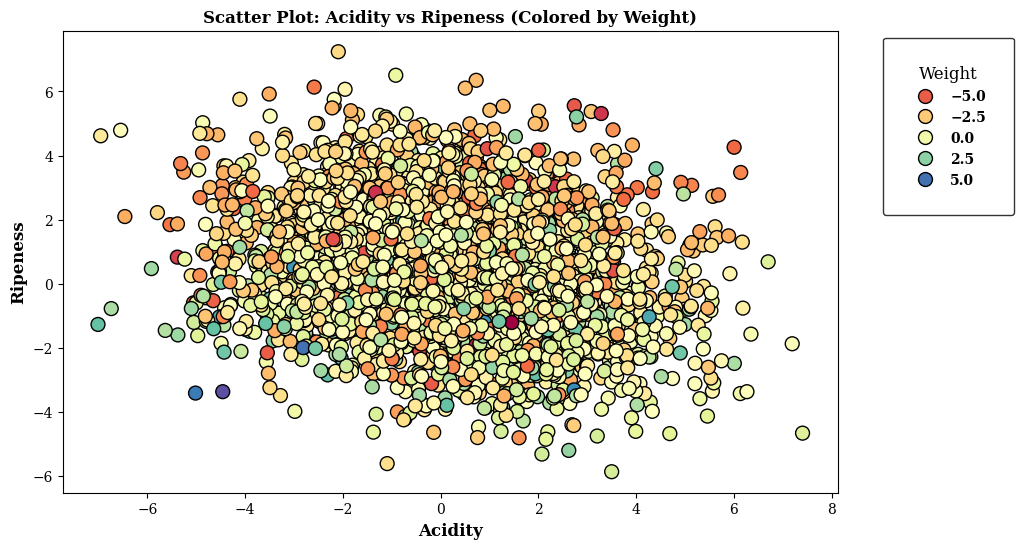

In [109]:
# Assuming df_filled contains the relevant columns
x_column = 'Acidity'
y_column = 'Ripeness'
hue_column = 'Weight'  # Replace with the third variable you want to use for color

# Define custom color palette
custom_palette = sns.color_palette("Spectral", as_cmap=True)

# Define custom font dictionary for title and labels
font = {'family': 'Serif', 'weight': 'bold', 'size': 12}
font2 = {'family': 'Serif', 'weight': 'bold', 'size': 10}

plt.figure(figsize=(10, 6))

# Create a scatter plot for 'Size' against another numeric column with hue
sns.scatterplot(
    x=df_filled[x_column],
    y=df_filled[y_column],
    hue=df_filled[hue_column],
    palette=custom_palette,
    s=100,               # Adjust the size of the circles
    linewidth=1,        # Adjust the border width
    edgecolor='black'   # Set the border color of the circles to black
)

# Set title and axis labels using custom fontdict
plt.title(f'Scatter Plot: {x_column} vs {y_column} (Colored by {hue_column})', fontdict=font)
plt.xlabel(x_column, fontdict=font)
plt.ylabel(y_column, fontdict=font)

plt.xticks(fontname='Serif', fontsize=10)
plt.yticks(fontname='Serif', fontsize=10)

# Display a legend with custom font and styling outside the plot
legend = plt.legend(title=hue_column,
                    prop=font2,
                    fontsize=8,
                    fancybox=True,
                    frameon=True,
                    facecolor='white',
                    edgecolor='black',
                    borderpad=2,
                    bbox_to_anchor=(1.05, 1),
                    loc='upper left')
legend.get_title().set_fontsize(12)  # Adjust the font size of the legend title
legend.get_title().set_fontfamily('Serif')  # Adjust the font family of the legend title

plt.show()

In [116]:
unique_values = df_filled['Quality'].unique()
print("Unique values in 'Quality' column:", unique_values)

Unique values in 'Quality' column: ['good' 'bad']


In [117]:
from sklearn.preprocessing import LabelEncoder

# Instantiate LabelEncoder
label_encoder = LabelEncoder()

# Encode the 'Quality' column
df_filled['Quality'] = label_encoder.fit_transform(df_filled['Quality'])

# Display the DataFrame after encoding
df_filled.head()


,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,1
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,1
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,0
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,1
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,1


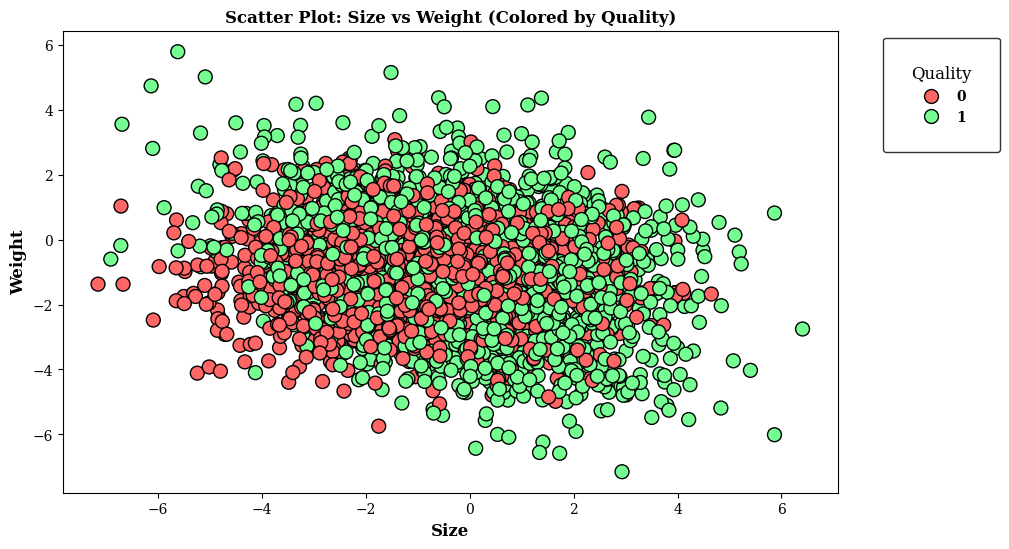

In [122]:
# Assuming df_filled contains the relevant columns
x_column = 'Size'
y_column = 'Weight'
hue_column = 'Quality'  # Replace with the third variable you want to use for color

# Define custom color palette
custom_colors = ['#ff6666' , '#75ff93']

# Define custom font dictionary for title and labels
font = {'family': 'Serif', 'weight': 'bold', 'size': 12}
font2 = {'family': 'Serif', 'weight': 'bold', 'size': 10}

plt.figure(figsize=(10, 6))

# Create a scatter plot for 'Size' against another numeric column with hue
sns.scatterplot(
    x=df_filled[x_column],
    y=df_filled[y_column],
    hue=df_filled[hue_column],
    palette=custom_colors,
    s=100,               # Adjust the size of the circles
    linewidth=1,        # Adjust the border width
    edgecolor='black'   # Set the border color of the circles to black
)

# Set title and axis labels using custom fontdict
plt.title(f'Scatter Plot: {x_column} vs {y_column} (Colored by {hue_column})', fontdict=font)
plt.xlabel(x_column, fontdict=font)
plt.ylabel(y_column, fontdict=font)

plt.xticks(fontname='Serif', fontsize=10)
plt.yticks(fontname='Serif', fontsize=10)


# Display a legend with custom font and styling outside the plot
legend = plt.legend(title=hue_column,
                    prop=font2,
                    fontsize=8,
                    fancybox=True,
                    frameon=True,
                    facecolor='white',
                    edgecolor='black',
                    borderpad=2,
                    bbox_to_anchor=(1.05, 1),
                    loc='upper left')
legend.get_title().set_fontsize(12)  # Adjust the font size of the legend title
legend.get_title().set_fontfamily('Serif')  # Adjust the font family of the legend title

plt.show()


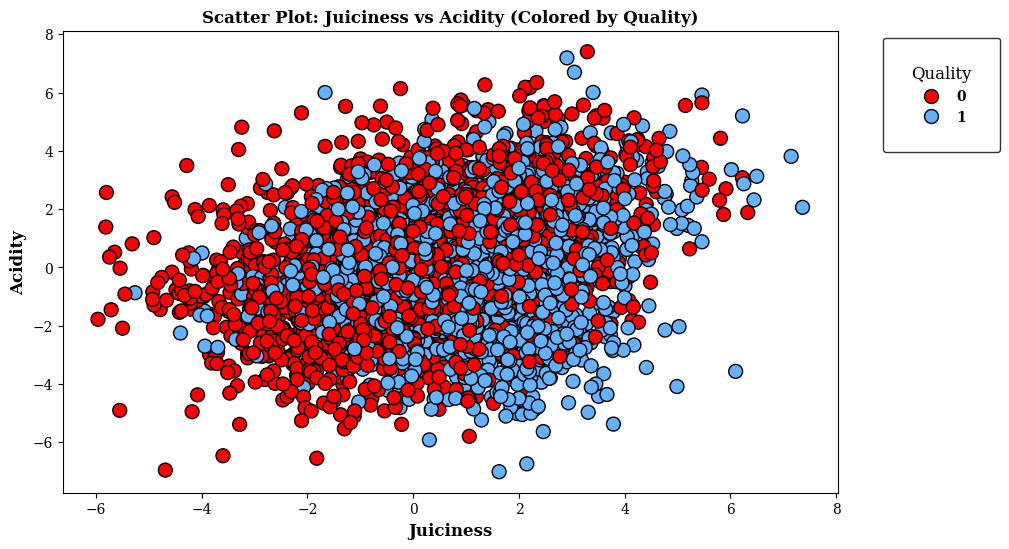

In [124]:
# Assuming df_filled contains the relevant columns
x_column = 'Juiciness'
y_column = 'Acidity'
hue_column = 'Quality'  # Replace with the third variable you want to use for color

# Define custom color palette
custom_colors = ['#ff0000' , '#63b1ff']

# Define custom font dictionary for title and labels
font = {'family': 'Serif', 'weight': 'bold', 'size': 12}
font2 = {'family': 'Serif', 'weight': 'bold', 'size': 10}

plt.figure(figsize=(10, 6))

# Create a scatter plot for 'Size' against another numeric column with hue
sns.scatterplot(
    x=df_filled[x_column],
    y=df_filled[y_column],
    hue=df_filled[hue_column],
    palette=custom_colors,
    s=100,               # Adjust the size of the circles
    linewidth=1,        # Adjust the border width
    edgecolor='black'   # Set the border color of the circles to black
)

# Set title and axis labels using custom fontdict
plt.title(f'Scatter Plot: {x_column} vs {y_column} (Colored by {hue_column})', fontdict=font)
plt.xlabel(x_column, fontdict=font)
plt.ylabel(y_column, fontdict=font)

plt.xticks(fontname='Serif', fontsize=10)
plt.yticks(fontname='Serif', fontsize=10)


# Display a legend with custom font and styling outside the plot
legend = plt.legend(title=hue_column,
                    prop=font2,
                    fontsize=8,
                    fancybox=True,
                    frameon=True,
                    facecolor='white',
                    edgecolor='black',
                    borderpad=2,
                    bbox_to_anchor=(1.05, 1),
                    loc='upper left')
legend.get_title().set_fontsize(12)  # Adjust the font size of the legend title
legend.get_title().set_fontfamily('Serif')  # Adjust the font family of the legend title

plt.show()


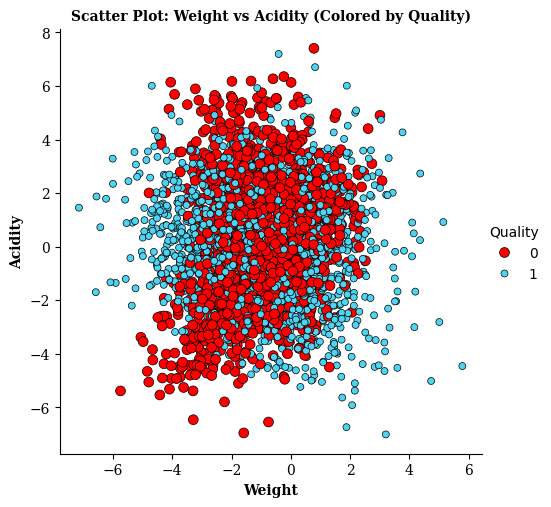

In [156]:
# Assuming df_filled contains the relevant columns
x_column = 'Weight'
y_column = 'Acidity'
sizes = 'Quality'  # Replace with the third variable you want to use for color

# Define custom font dictionary for title and labels
font = {'family': 'Serif', 'weight': 'bold', 'size': 10}

plt.rcParams["figure.figsize"] = (20, 8)

# Custom colors for 'Quality' (you can adjust these colors)
custom_colors = {0: '#ff0000', 1: '#4dd4f2'}

# Custom edge border color
edge_color = 'black'

# Create a scatter plot for 'Size' against another numeric column with hue
scatter_plot = sns.relplot(data=df_filled,
                           x=x_column,
                           y=y_column,
                           size=sizes,
                           sizes=(25, 50),
                           hue='Quality',
                           palette=custom_colors,  # Apply custom colors
                           edgecolor=edge_color,   # Apply edge border color
                           linewidth=0.5)          # Adjust edge border width

# Set title and axis labels using custom fontdict
plt.title(f'Scatter Plot: {x_column} vs {y_column} (Colored by Quality)', fontdict=font)
plt.xlabel(x_column, fontdict=font)
plt.ylabel(y_column, fontdict=font)

plt.xticks(fontname='Serif', fontsize=10)
plt.yticks(fontname='Serif', fontsize=10)

# Show the plot
plt.show()


In [158]:
# Save the DataFrame to a CSV file
df_filled.to_csv('/content/drive/MyDrive/Practice_Project_Datasets/df_filled.csv', index=False)